In [1]:
# STATISTICAL LEARNING refers to a collection of mathematical and computational tools to understand data.

# In SUPERVISED LEARNING goal is to estimate or predict an output based on one or more inputs.
 # The INPUTS have many names like predictors, independent variables, features and variables being called common.
 # The OUTPUTS are often called response variables or dependent variables.

# If the response is QUANTITATIVE: say, a number that measures height or weight, we call these problems REGRESSION problems.
# If the response is QUALITATIVE: say, yes or no, or blue oe green, we call these problems classification problems.
 

In [2]:
# This case study deals with one specific approch to classification.

# The goal is to set up a classifier such that when it is presented with a new observation whose category is not known,
 # it will attempt to assign that observation to a category, or a class, based on the observations for which it does
 # know the true category.   
# This specific menthod is known as k-Nearest Neighbors classifier, or kNN for short.


In [3]:
# Finding the distance(Euclidean Distance) between two points.

import numpy as np

p1 = np.array([1,1])
p2 = np.array([4,4])
np.sqrt(np.sum(np.power(p2-p1, 2))) # distance between two points sqrt((x2-x1)*2 + (y2-y1)*2)

4.242640687119285

In [4]:
def distance(p1,p2):
    """Find the distance between two points"""
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

In [5]:
a1 = np.array([4,5])
a2 = np.array([8,9])
distance(a1,a2)

5.656854249492381

In [6]:
# Computing the MAJORITY VOTE
def majority_vote_count(votes):
    """Counts the number of appearence for each value in a  list """
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    return vote_counts

In [7]:
votes = [1,2,3,3,2,1,3,2,1,1,2,3,3,3,3,2,2,1]
vote_counts = majority_vote_count(votes)
vote_counts

{1: 5, 2: 6, 3: 7}

In [8]:
print(max(vote_counts))
print(max(vote_counts.keys()))
print(max(vote_counts.values()))

3
3
7


In [9]:
winners = []
max_count = max(vote_counts.values())
for vote, count in vote_counts.items():
    if count == max_count:
        winners.append(vote)

In [10]:
# In case of a tie we can randomly pick a winner
winners

[3]

In [11]:
# Computing the MAJORITY VOTE
import random

def majority_vote(votes):
    """Counts the number of appearence for each value in a  list """
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    winner = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winner.append(vote)
    return random.choice(winner) # In a case of tie it will return a random winner

In [12]:
votes = [1,2,3,3,2,1,3,2,1,1,2,3,3,3,3,2,2,1]
majority_vote(votes)

3

In [13]:
# As the most commonly occuring element in a sequence is called MODE in statistics.
import scipy.stats as ss
def majority_vote_short(votes):
    mode, count = ss.mstats.mode(votes)
    return (mode, count)

In [14]:
votes = [1,2,3,3,2,1,3,2,1,1,2,3,3,3,3,2,2,1]
majority_vote_short(votes)

(array([3.]), array([7.]))

<function matplotlib.pyplot.show(*args, **kw)>

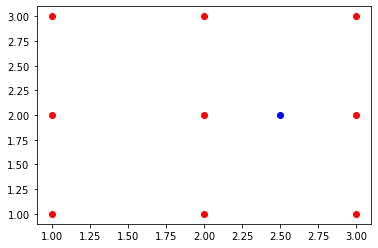

In [53]:
# Finding Nearest Neighbour

# INFROMAL PSEUDOCODE
# loop over all points
    # compute the distance between point p and every other point
# sort distance and return those k points that are nearest to point p

import matplotlib.pyplot as plt

points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5, 2])

plt.plot(points[:,0], points[:,1], "ro") # first point is all of the rows in column 0 and the 2nd point is all of the rows in column 1
plt.plot(p[0], p[1], "bo")
plt.show

In [16]:
points

array([[1, 1],
       [1, 2],
       [1, 3],
       [2, 1],
       [2, 2],
       [2, 3],
       [3, 1],
       [3, 2],
       [3, 3]])

In [17]:
points.shape[0]

9

In [18]:
distances = np.zeros(points.shape[0])
distances

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
distances = np.zeros(points.shape[0])
for i  in range(len(distances)):
    distances[i] = distance(p, points[i])

In [20]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [21]:
# We could sort the distances to give us sorted distances, but instead what we really would like to get
  # is an index vector that would sort the array. If we had that we could take the first k element of 
  # that array, and know that the corresponding points are the k closest points to point of interest p.

# Fortunately this function exist in NumPy called argsort(it returns to indices that would sort the given array)

ind = np.argsort(distances)
print("Indices of sorted distances: ", ind) # returns the indices of sorted distances
print("Distances of sorted indices: ", distances[ind])
print(distances[ind[0:2]]) # we have found the rwo nearest points to our point p.

Indices of sorted distances:  [4 7 3 5 6 8 1 0 2]
Distances of sorted indices:  [0.5        0.5        1.11803399 1.11803399 1.11803399 1.11803399
 1.5        1.80277564 1.80277564]
[0.5 0.5]


In [22]:
# Finding Nearest Neighbors

            # INFROMAL PSEUDOCODE
# loop over all points
    # compute the distance between point p and every other point
# sort distance and return those k points that are nearest to point p

def find_nearest(p, points, k=5): # k means indices of nearest neighbors and in this case we want 5 indices by default.
    """Find the k nearest neighbors of point p and return their indices"""
    distances = np.zeros(points.shape[0])
    for i  in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [23]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5, 2])

ind = find_nearest(p, points, 2); print(points[ind]) # it returns the nearest points 

[[2 2]
 [3 2]]


In [24]:
ind = find_nearest(p, points, 4); print(points[ind])

[[2 2]
 [3 2]
 [2 1]
 [2 3]]


In [25]:
# Writing a function to predict the class of our new point p.

            # INFROMAL PSEUDOCODE
# find the k nearest neighbor
# predict the class of p based on majority vote

# However to be able to make a class prediction, we also need to know the classes to which these k points belong to.
  # we will add one more argument outcomes(the classes of all the points that are specified in the input variable points)
def knn_predict(p, points,outcomes, k=5):
    find_nearest(p, points, k)
    return majority_vote(outcomes[ind])

In [26]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p1 = np.array([2.5, 2.7])
knn_predict(p1, points, outcomes, k=5) # predicts the class (0 or 1) in which our point will come

1

In [27]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p1 = np.array([2.5, 2.7])
ind = find_nearest(p1, points, 5)
ind

array([5, 8, 4, 7, 2], dtype=int64)

In [28]:
majority_vote(outcomes[ind])

1

In [29]:
p2 = np.array([1,2.7])
knn_predict(p2 , points, outcomes, k=5)

1

In [30]:
# GENERATING SYNTHETIC DATA

# A function that generates two end data points, where first end points are from class 0 and the second
  # end points are from class 1.
# These data are known as synthetic data because we will be generating these data with the help of computer.

# In this case we'll generate predictors from two bivariate normal distribution, 
  #where the first distribution give rise to observation belonging to class 0, and the second give rise to class 1.
# The word, bivariate, just means two variables, like x and y.

# For generating the synthetic data we'll be using scipy.stats module.



In [31]:
# ss.norm(NORMAL DISTRIBUTION) contain two argument mean and standard deviation

def generate_synth_data(n=50): # If user would not enter any value default argument would be 50
    """Create two sets of points from bivariate normal distribution."""
    points = np.concatenate( (ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0 ) # this will generate n rows x 2 columns
    outcomes = np.concatenate( (np.repeat(0,n), np.repeat(1,n))) # generate n times outcome for class 0 and class 1
    return(points, outcomes)

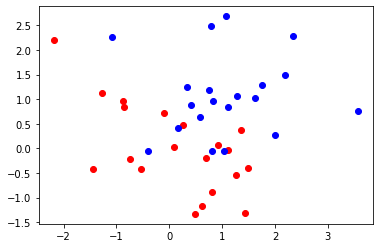

In [32]:
n = 20
(points,outcomes) = generate_synth_data(n)
plt.figure()
plt.plot(points[:n, 0], points[:n, 1], "ro") # corresponds to first n rows, x coordinates are in col 0 and y in col 1.
plt.plot(points[n:,0], points[n:,1], "bo") # corresponds to remaining rows, x coordinates are in col 0 and y in col 1.
plt.savefig("bivardata.pdf")

In [55]:
print(points.shape)
print(outcomes.shape)

(9, 2)
(150,)


In [34]:
len(points)

40

In [35]:
#                  MESHGRID
# Meshgrid takes in two or more coordinate vectors, say one value containing the x values of interest 
  # and the other containing the y values of interest.
# It returns matrices, the first containing the x values for each grid point 
  # and the second containing the y values for each grid point

# Precisely what meshgrid does is that the first output it provides is going to be the x values of each of the
  # coordinate pairs, the second output it provide will be the y values of each of the coordinate pairs.



In [36]:
#    MAKING A PREDICTION GRID

# This function will run through all of the points on our prediction grid and will predict the class label corresponding to that point.

def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classify each point on the prediction grid."""
    (x_min, x_max, y_min, y_max) = limits # user will provide a tuple called Limits, here we are unpacking it
    xs = np.arange(x_min, x_max, h) # x values of our grid(starting point, ending point, increament)
    ys = np.arange(y_min, y_max, h) # y values of our grid
    xx, yy= np.meshgrid(xs, ys) # it generates two dimensional arrays
    
    # we next need to generate our classifiers prediction corresponding to every point of meshgrid
    prediction_grid = np.zeros(xx.shape, dtype = int) #size will be of xx or yy and  data type is integer because we know that the class label is either 0 or 1
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y]) # current values for x and current values for y
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k) # Predict the outcome that is associated with the given point. 
            # In prediction_grid[j,i] j or y values are the rows of the array and i or x values are column of the array.
    return(xx, yy, prediction_grid)


In [37]:
#             PLOTTING PREDICTION GRID

def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1')
    plt.ylabel('Variable 2')
    plt.xticks(())
    plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [38]:
(predictors, outcomes) = generate_synth_data()

In [39]:
predictors.shape

(100, 2)

In [40]:
outcomes.shape

(100,)

In [41]:
k = 5
filename = "knn_synth_5.pdf"
limits = (-3,4,-3,4)
h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)

In [42]:
print(xx.shape)
print(yy.shape)
print(prediction_grid.shape)

(70, 70)
(70, 70)
(70, 70)


In [43]:
print(np.min(xx))
print(np.max(xx))
print(np.min(yy))
print(np.max(yy))

-3.0
3.9000000000000057
-3.0
3.9000000000000057


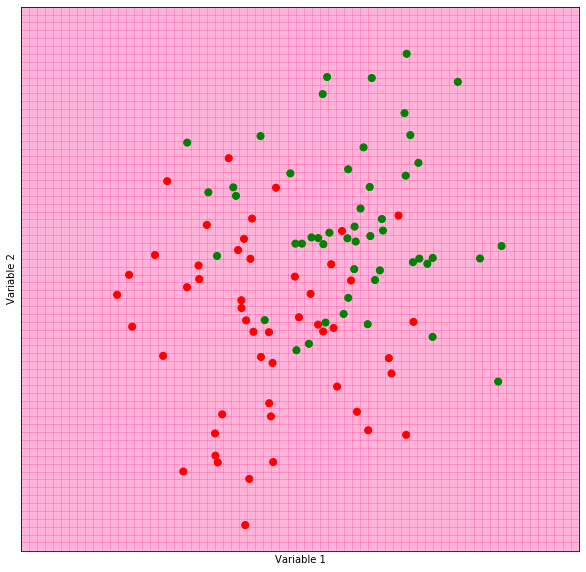

In [44]:
plot_prediction_grid(xx, yy, prediction_grid, filename)

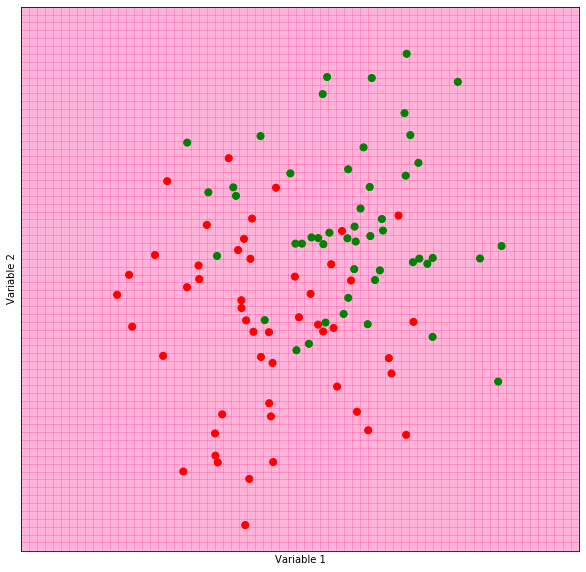

In [45]:
k = 50
filename = "knn_synth_50.pdf"
limits = (-3,4,-3,4)
h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [46]:
#                   APPLYING THE kNN METHOD

# ScikitLearn is an open source machine learning library for python and there is much more to explore.
  # It's a very extensive library. Here, we only make use of it's knn classifier.
    
# We'll be applying both ScikitLearn and our homemade classifier to a classic data set created by Ron Fisher in 1933.
  # The data consist of 150 different iris flowers.
    # 50 from each of three different species.

# For each flower we have the following co-variate: sepal length, sepal width, petal length and petal width.

In [47]:
from sklearn import datasets
iris = datasets.load_iris()

In [48]:
iris["data"] # sepal length, sepal width, petal length and petal width.

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [49]:
predictors = iris.data[:, 0:2]
outcomes = iris.target

In [57]:
predictors.shape

(150, 2)

In [50]:
outcomes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

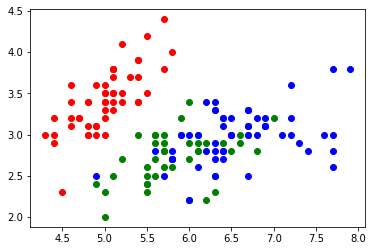

In [51]:
predictors = iris.data[:, 0:2]
outcomes = iris.target

plt.plot(predictors[outcomes == 0][:, 0], predictors[outcomes == 0][:, 1], "ro" ) # for x coordinate all of the rows of column 0 and for y coordinate all of the rows for column 1, where outcome is equal to 0.
plt.plot(predictors[outcomes == 1][:, 0], predictors[outcomes == 1][:, 1], "go" ) # where outcome is equal to 1.
plt.plot(predictors[outcomes == 2][:, 0], predictors[outcomes == 2][:, 1], "bo" ) # where outcome is equal to 2.
plt.savefig("iris.pdf")

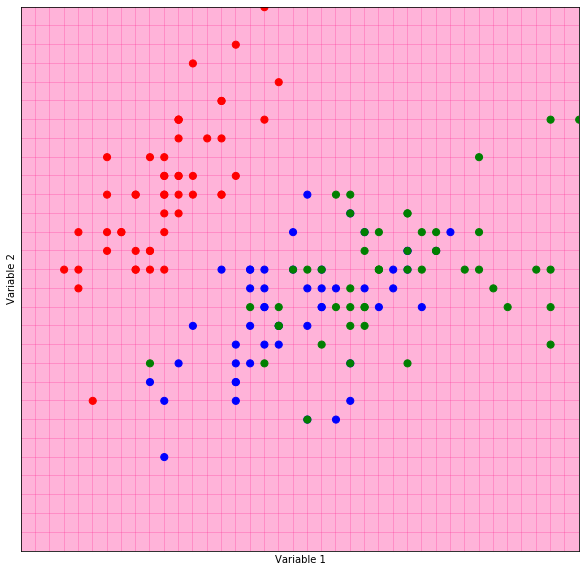

In [52]:
k = 5
filename = "iris_grid.pdf"
limits = (4, 8, 1.5, 4.5)
h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [76]:
# Testifying kNN classifier using the both algorithms from SciKitLearn as well as our own homemade algorithm.

# We'll be importing the KNeighborsClassifier from sklearn.neighbors module. 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors,outcomes)
sk_predictions = knn.predict(predictors) 

In [77]:
sk_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1])

In [78]:
sk_predictions.shape

(150,)

In [79]:
sk_predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [81]:
my_predictions.shape

(150,)

In [82]:
# compairing the both predictions from sklearn module and our own.

sk_predictions == my_predictions 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [85]:
print(100*np.mean(sk_predictions == my_predictions ))

32.666666666666664


In [86]:
print(100*np.mean(sk_predictions == outcomes ))

83.33333333333334


In [87]:
print(100*np.mean( my_predictions == outcomes ))

33.33333333333333
